# Benchmark code for 3d correlation function

This code requires cluster_toolkit.

In [235]:
import numpy as np
import pyccl as ccl
import cluster_toolkit
#cluster toolkit package is available at http://cluster-toolkit.readthedocs.io/en/latest/source/installation.html
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
p1 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, w0=-1.0, wa=0.0, Omega_g=0)
p2 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, w0=-0.9, wa=0.0, Omega_g=0)
p3 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, w0=-0.9, wa=0.1, Omega_g=0)
p4 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, w0=-0.9, wa=0.1, Omega_g=0)
p5 = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.80, n_s=0.96, w0=-0.9, wa=0.1, Omega_g=0)

# define the cosmology model to use
cosmo = ccl.Cosmology(p1)

In [237]:
k = np.logspace(np.log10(5.e-5), 3., 730000) # Wavenumber
h = 0.7

In [238]:
# CCL power spectrum
pk = []
for n in range(6):
    pk.append(ccl.nonlin_matter_power(cosmo, k, 1./(n+1)))

In [239]:
# calculate CCL xi and benchmark xi for r = 0.1 - 100 with 40 bins
nr1 = 40
r1 = np.logspace(-1, 2, nr1)

xi1 = []
for n in range(6):
    xi1.append(ccl.correlation_3d(cosmo, 1./(n+1), r1))

xi_toolkit1 = []
for n in range(6):
    xi_toolkit1.append(cluster_toolkit.xi.xi_mm_at_R(h*r1, k/h, pk[n]*h*h*h, exact=True))    
        
# calculate CCL xi and benchmark xi for r = 50 - 250 with 100 bins to check agreement in teh BAO peak region
nr2 = 100
r2 = np.logspace(np.log10(50), np.log10(250), nr2)

xi2 = []
for n in range(6):
    xi2.append(ccl.correlation_3d(cosmo, 1./(n+1), r2))

xi_toolkit2 = []
for n in range(6):
    xi_toolkit2.append(cluster_toolkit.xi.xi_mm_at_R(h*r2, k/h, pk[n]*h*h*h, exact=True))

In [240]:
# write benchmark xi to file
f = open('model1_xi.txt','w')

f.write('#  [0] r (Mpc; comoving), [1] xi(r,z=0.0), [2] xi(r,z=1.0), [3] xi(r,z=2.0), [4] xi(r,z=3.0), [5] xi(r,z=4.0), [6] xi(r,z=5.0)' + '\n')

for i in range(140):
    col = []
    s = ''
    if i < 40:
        col.append("{:.18e}".format(r1[i]).ljust(25))
        for n in range(6):
            col.append("{:.18e}".format(xi_toolkit1[n][i]).ljust(25))
    else:
        col.append("{:.18e}".format(r2[i-40]).ljust(25))
        for n in range(6):
            col.append("{:.18e}".format(xi_toolkit2[n][i-40]).ljust(25))
    for i in range(7):
        s = s + col[i]        
    f.write(s + '\n')

f.close()

In [241]:
# print some values
n = 0 # redshift    
print "r                        xi(CCL)                   xi(benchmark)            Delta(r^2 xi)       Delta xi / xi_benchmark"
for i in range(140):
    col = []
    s = ''
    if i < 40:
        col.append("{:.5e}".format(r1[i]).ljust(25))
        col.append("{:.5e}".format(xi1[n][i]).ljust(25))
        col.append("{:.5e}".format(xi_toolkit1[n][i]).ljust(25))
        err = r1[i]*r1[i]*(xi1[n][i]-xi_toolkit1[n][i])
        col.append("{:.5e}".format(err).ljust(25))
        rel_diff = (xi1[n][i]-xi_toolkit1[n][i])/xi_toolkit1[n][i]
        col.append("{:.5e}".format(rel_diff).ljust(25))
    #s = col[0] + col[1] + col[2] + col[3] + col[4]
    else:
        col.append("{:.5e}".format(r2[i-40]).ljust(25))
        col.append("{:.5e}".format(xi2[n][i-40]).ljust(25))
        col.append("{:.5e}".format(xi_toolkit2[n][i-40]).ljust(25))
        err = r2[i-40]*r2[i-40]*(xi2[n][i-40]-xi_toolkit2[n][i-40])
        col.append("{:.5e}".format(err).ljust(25))
        rel_diff = (xi2[n][i-40]-xi_toolkit2[n][i-40])/xi_toolkit2[n][i-40]
        col.append("{:.5e}".format(rel_diff).ljust(25)) 
    s = col[0] + col[1] + col[2] + col[3] + col[4]
        
    print(s)

r                        xi(CCL)                   xi(benchmark)            Delta(r^2 xi)       Delta xi / xi_benchmark
1.00000e-01              9.63360e+02              9.65569e+02              -2.20935e-02             -2.28814e-03             
1.19378e-01              8.09978e+02              8.11265e+02              -1.83414e-02             -1.58644e-03             
1.42510e-01              6.78664e+02              6.78494e+02              3.44608e-03              2.50084e-04              
1.70125e-01              5.62602e+02              5.63139e+02              -1.55381e-02             -9.53329e-04             
2.03092e-01              4.64437e+02              4.64339e+02              4.07474e-03              2.12755e-04              
2.42446e-01              3.79676e+02              3.79285e+02              2.29661e-02              1.03013e-03              
2.89427e-01              3.06855e+02              3.07006e+02              -1.26417e-02             -4.91566e-04            

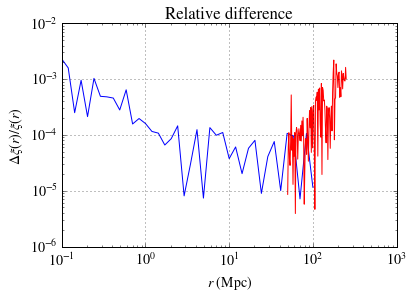

frac diff for r = 0.1-100:  0.0022881353999696374
frac diff for r = 50-250:  0.002192923048821349


In [242]:
# Plot relative difference
frac_diff1 = []
frac_diff2 = []
abs_diff1 = []    
abs_diff2 = []

for i in range(nr1):
    frac_diff1.append(np.abs(xi1[n][i]/xi_toolkit1[n][i] - 1.))
    abs_diff1.append(np.abs(r1[i]*r1[i]*(xi1[n][i]-xi_toolkit1[n][i])))
    #print r1[i], xi_toolkit1[n][i], xi1[n][i], r1[i]*r1[i]*(xi1[n][i]-xi_toolkit1[n][i])
    
for i in range(nr2):
    frac_diff2.append(np.abs(1-xi2[n][i]/xi_toolkit2[n][i]))
    abs_diff2.append(np.abs(r2[i]*r2[i]*(xi2[n][i]-xi_toolkit2[n][i])))

# esthetic definitions for the plots
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 14

plt.plot(r1, frac_diff1, 'b-')
plt.plot(r2, frac_diff2, 'r-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r$ (Mpc)')
plt.ylabel(r'$\Delta \xi(r) / \xi(r)$')
plt.grid(which='major')
plt.title('Relative difference') 
plt.savefig('benchmark_rel.pdf',bbox_inches = 'tight')
plt.show()
#print frac_diff1
print "frac diff for r = 0.1-100: ", np.amax(frac_diff1)
print "frac diff for r = 50-250: ", np.amax(frac_diff2)

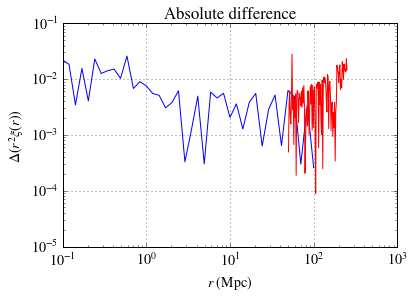

max diff for r = 0.1-100:  0.025862405527988578
max diff for r = 50-250:  0.027959564832195707
average Delta(r^2 xi) for r=140-150 Mpc: 0.007588737566025572


In [243]:
# plot absolute difference in r^2 xi(r)
plt.plot(r1, abs_diff1, 'b-')
plt.plot(r2, abs_diff2, 'r-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r$ (Mpc)')
plt.ylabel(r'$\Delta (r^2 \xi(r)) $')
plt.grid(which='minor')
plt.title('Absolute difference') 
plt.grid(which='both')
plt.savefig('benchmark_abs.pdf',bbox_inches = 'tight')
plt.show()
#print abs_diff
print "max diff for r = 0.1-100: ", np.amax(abs_diff1)
print "max diff for r = 50-250: ", np.amax(abs_diff2)


# find and print the average of Delta(r^2 xi) in the BAO peak region
max_value = 0
max_value_index = 0
avg_value = 0
for i in range(63,68):
    #print i, r2[i], abs_diff2[i]
    avg_value = avg_value + abs_diff2[i]
avg_value = avg_value / 5.
print "average Delta(r^2 xi) for r=140-150 Mpc:", avg_value    

In [244]:
for i in range(nr1):
    col = []
    s = ''
    col.append("{:.18e}".format(r1[i]).ljust(25))
    col.append("{:.18e}".format(frac_diff1[i]).ljust(25))
    col.append("{:.18e}".format(abs_diff1[i]).ljust(25))
    s = col[0] + col[1] + col[2]  
    #print(s)

In [245]:
for i in range(nr2):
    col = []
    s = ''
    col.append("{:.18e}".format(r2[i]).ljust(25))
    col.append("{:.18e}".format(frac_diff2[i]).ljust(25))
    col.append("{:.18e}".format(abs_diff2[i]).ljust(25))
    s = col[0] + col[1] + col[2]  
    #print(s)